### Import needed libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading The Dataset

In [2]:
df = pd.read_csv('/kaggle/input/facebook-data/pseudo_facebook.csv')

### Exploring the Data

In [3]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [4]:
df.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98826 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 98826 non-null  int64  
 1   age                    98826 non-null  int64  
 2   dob_day                98826 non-null  int64  
 3   dob_year               98826 non-null  int64  
 4   dob_month              98826 non-null  int64  
 5   gender                 98826 non-null  object 
 6   tenure                 98826 non-null  float64
 7   friend_count           98826 non-null  int64  
 8   friendships_initiated  98826 non-null  int64  
 9   likes                  98826 non-null  int64  
 10  likes_received         98826 non-null  int64  
 11  mobile_likes           98826 non-null  int64  
 12  mobile_likes_received  98826 non-null  int64  
 13  www_likes              98826 non-null  int64  
 14  www_likes_received     98826 non-null  int64  
dtypes: floa

### Analysis & Visualization

In [9]:
genders = df['gender'].value_counts()
genders

gender
male      58574
female    40252
Name: count, dtype: int64

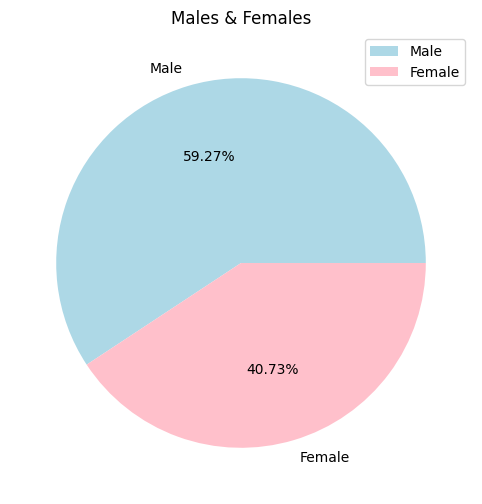

In [10]:
plt.figure(figsize=(10,6))
plt.pie(genders, labels=['Male', 'Female'], autopct='%.2f%%', colors=['lightblue','pink']) 
plt.title('Males & Females')
plt.legend()
plt.show()

In [11]:
ages = df['age'].value_counts()
ages

age
18     5196
23     4402
19     4390
20     3768
21     3670
       ... 
87       41
112      18
111      17
110      14
109       9
Name: count, Length: 101, dtype: int64

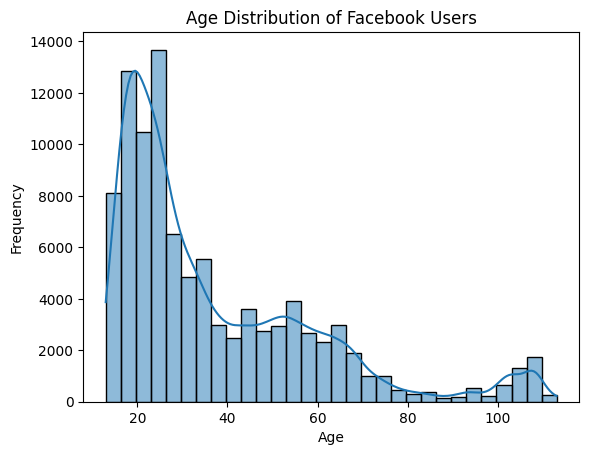

In [12]:
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution of Facebook Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [13]:
no_of_friends = df.groupby('gender')['friend_count'].sum().reset_index()
no_of_friends

,gender,friend_count
0,female,9740073
1,male,9666787


 We can see that number of friend of males and females are almost the same

In [14]:
no_of_likes_received = df.groupby('gender')['likes_received'].sum()
no_of_likes_received

gender
female    10121203
male       3977851
Name: likes_received, dtype: int64

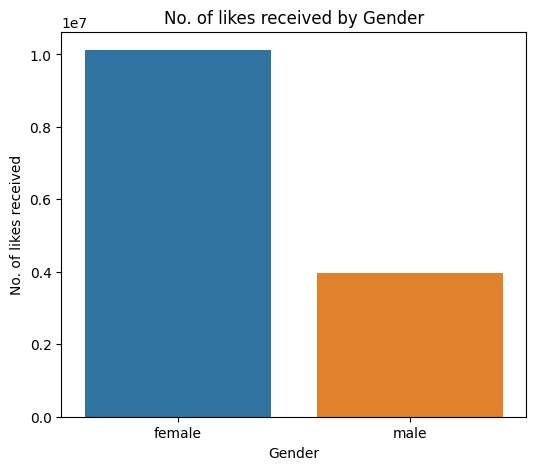

In [15]:
plt.figure(figsize=(6,5))
sns.barplot(x = no_of_likes_received.index , y = no_of_likes_received.values)
plt.title('No. of likes received by Gender')
plt.xlabel('Gender')
plt.ylabel('No. of likes received')
plt.show()

In [16]:
no_of_likes = df.groupby('gender')['likes'].sum()
no_of_likes

gender
female    10467978
male       4959923
Name: likes, dtype: int64

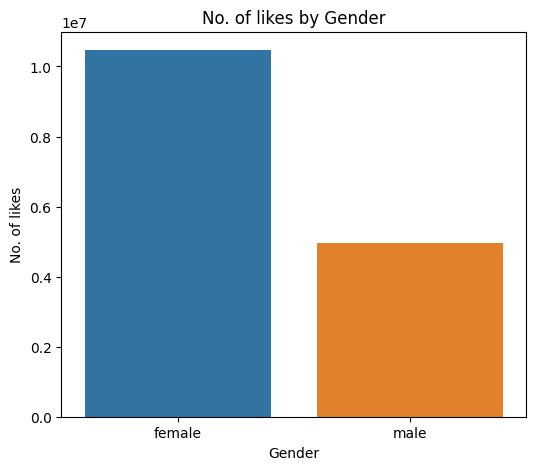

In [17]:
plt.figure(figsize=(6,5))
sns.barplot(x = no_of_likes.index , y = no_of_likes.values)
plt.title('No. of likes by Gender')
plt.xlabel('Gender')
plt.ylabel('No. of likes')
plt.show()

In [18]:
age_grp=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
df['age_group'] = pd.cut(df.age,bins=np.arange(10,121,10),labels=age_grp,right=True)
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20


In [19]:
age_gender = df[['age_group', 'gender']].value_counts().reset_index()
age_gender

,age_group,gender,count
0,21-30,male,18828
1,10-20,male,15044
2,21-30,female,9806
3,10-20,female,9703
4,31-40,male,7799
5,41-50,male,5031
6,51-60,female,4921
7,31-40,female,4688
8,51-60,male,4367
9,41-50,female,3931


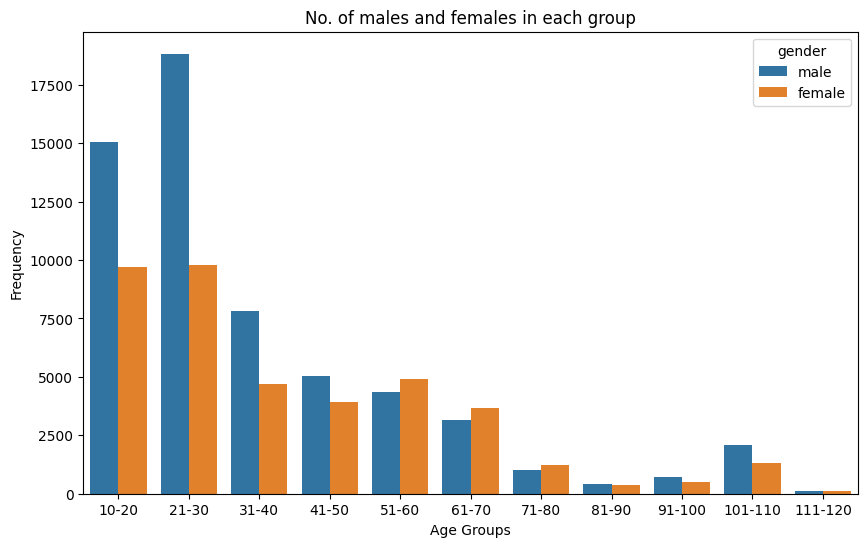

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(data = age_gender, x= 'age_group' , y='count', hue='gender')
plt.title('No. of males and females in each group')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.show()

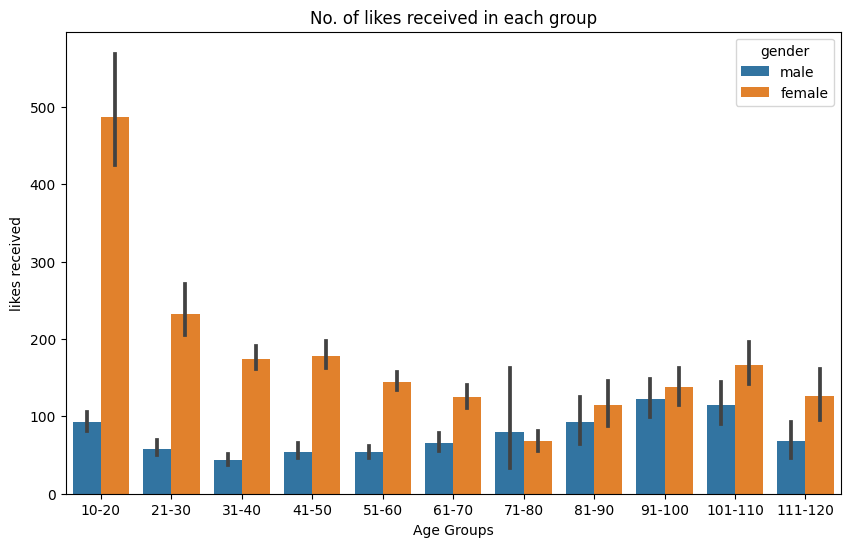

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x= 'age_group' , y='likes_received', hue='gender')
plt.title('No. of likes received in each group')
plt.xlabel('Age Groups')
plt.ylabel('likes received')
plt.show()

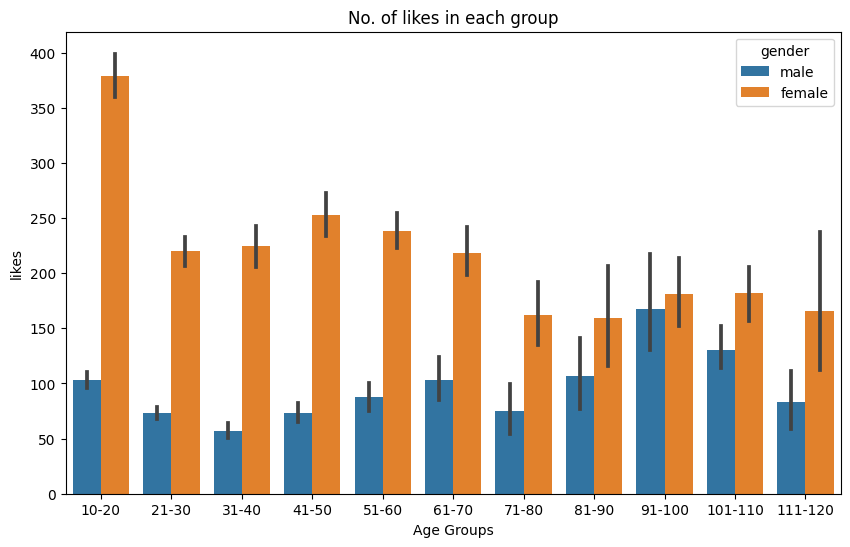

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x= 'age_group' , y='likes', hue='gender')
plt.title('No. of likes in each group')
plt.xlabel('Age Groups')
plt.ylabel('likes')
plt.show()

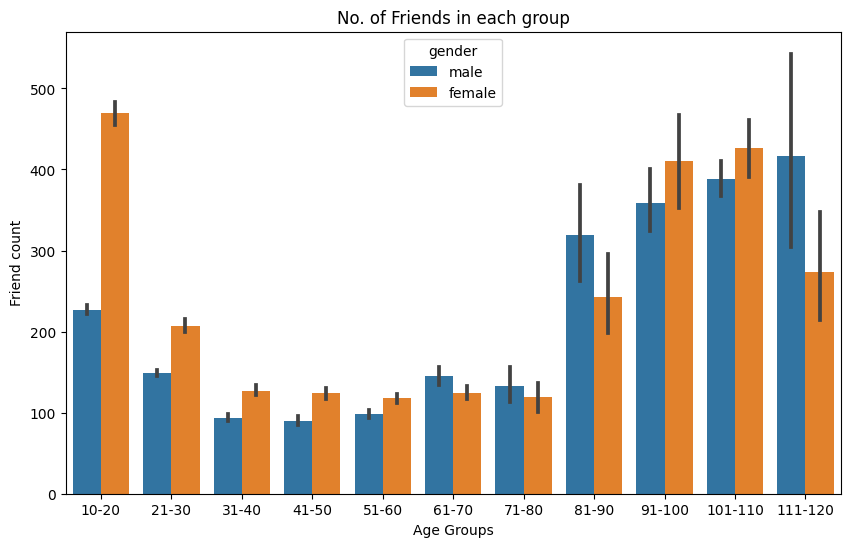

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x= 'age_group' , y='friend_count', hue='gender')
plt.title('No. of Friends in each group')
plt.xlabel('Age Groups')
plt.ylabel('Friend count')
plt.show()